In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=.5,
                  shuffle=True,
                  random_state=0)

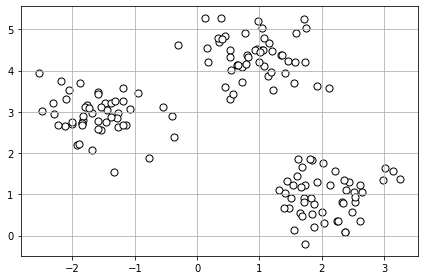

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],
            X[:,1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.grid()
plt.tight_layout()
plt.show()

[(1.0, 0.0, 0.0, 1.0), (0.03124934374934376, 1.0, 1.3125013124790507e-06, 1.0), (0.0, 0.062501968751969, 1.0, 1.0)]


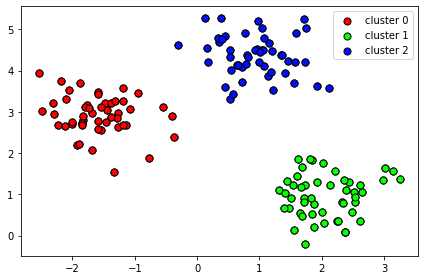

In [4]:
from sklearn.cluster import KMeans
from matplotlib.cm import get_cmap
import numpy as np

n_clusters=3

km = KMeans(n_clusters=n_clusters,
            init='k-means++',
            n_init=10,
            max_iter=30,
            tol=1e-4,
            random_state=0)

y_km = km.fit_predict(X)

cmap = get_cmap('hsv')
n_colors = n_clusters
colors = [cmap(c) for c in np.arange(0,n_colors)/n_colors]

print(colors)

plt.scatter(X[:,0],
            X[:,1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)

for i_cluster in range(0,n_clusters):
    plt.scatter(X[y_km==i_cluster, 0],
                X[y_km==i_cluster, 1],
                color=colors[i_cluster],
                marker='o',
                edgecolor='black',
                label = f"cluster {i_cluster}",
                s=50)
plt.legend()
plt.tight_layout()
plt.show()
            

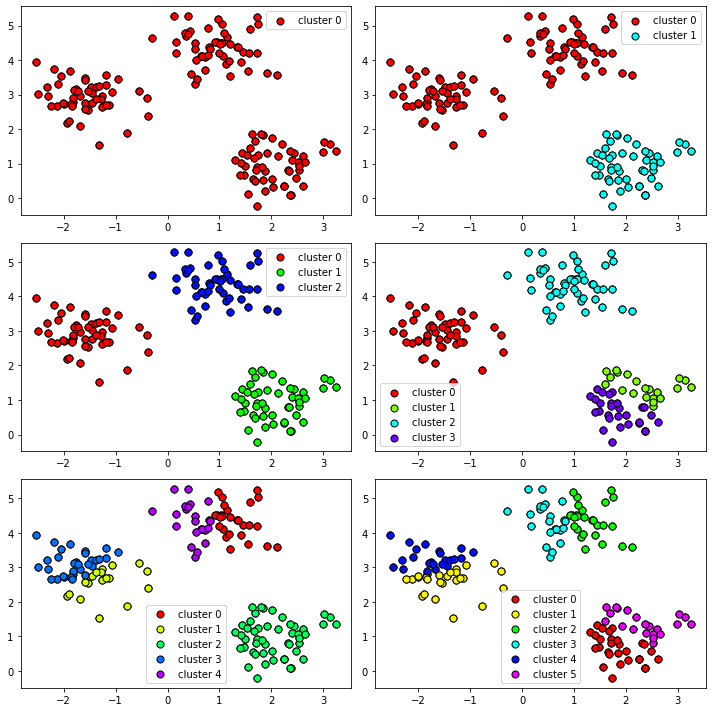

In [9]:
#########################################################
### Elbow method for selecting the number of clusters ###
#########################################################

def plot_kmeans_result(X, y_km):
    n_clusters = max(y_km)+1
    
    cm = get_cmap('hsv')
    n_colors = n_clusters
    colors = [cm(c) for c in np.arange(0,n_colors)/n_colors]

    plt.scatter(X[:,0],
                X[:,1],
                c='white',
                marker='o',
                edgecolor='black',
                s=50)

    for i_cluster in range(0,n_clusters):
        plt.scatter(X[y_km==i_cluster, 0],
                    X[y_km==i_cluster, 1],
                    color=colors[i_cluster],
                    marker='o',
                    edgecolor='black',
                    label = f"cluster {i_cluster}",
                    s=50)
    plt.legend()
    

n_clusters_max = 6
distortions = []*n_clusters_max
fig = plt.figure(figsize=(10, 10))
n_clusters_list = [i for i in range(1,n_clusters_max+1)]
km = (n_clusters_max+1)*['']
y_km = km.copy()
for n_clusters, i in zip(n_clusters_list, range(1,n_clusters_max+1)):
    km[i] = KMeans(n_clusters=n_clusters,
                init='k-means++',
                n_init=10,
                max_iter=30,
                tol=1e-4,
                random_state=0)
    y_km[i] = km[i].fit_predict(X)
    km[i].fit(X)
    distortions.append(km[i].inertia_)
    
    plt.subplot((n_clusters_max+1)/2,2,n_clusters)
    plot_kmeans_result(X, y_km[i])
    
fig.tight_layout()
    


[1 2 3 4 5 6]
[         nan 219.25381005 201.34960207   3.08304867  -2.30396496
          nan]


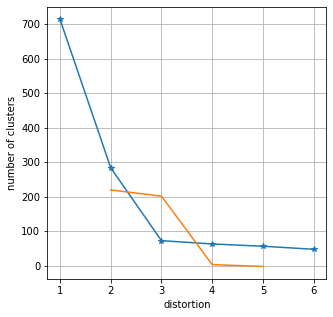

In [10]:
n_clusters_array = np.array(n_clusters_list)


fig2 = plt.figure(figsize=(5,5))
plt.plot(n_clusters_array, distortions, marker='*')
plt.grid()
plt.ylabel('number of clusters')
plt.xlabel('distortion')

### curvature ###
dist = np.array(distortions)

dist_curv = np.append(np.insert(np.diff(np.diff(dist)), 0, np.nan), np.nan)

plt.plot(n_clusters_array, dist_curv)

print(n_clusters_array)
print(dist_curv)

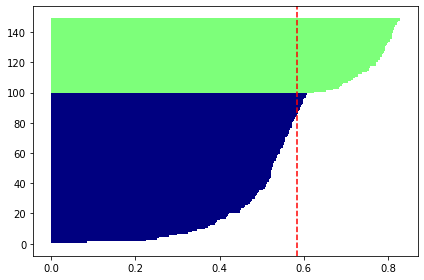

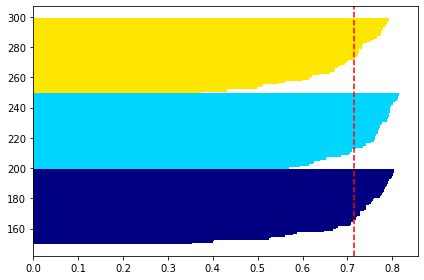

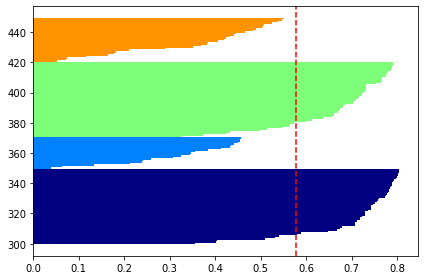

In [25]:
##################################
####### Silhouete plots ##########
##################################
from sklearn.metrics import silhouette_samples
from matplotlib import cm

yticks = []
y_ax_lower, y_ax_upper = 0, 0
for j in [2,3,4]:
    
    cluster_labels = np.unique(y_km[j])
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km[j], 
                                         metric='euclidean')
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km[j] == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.tight_layout()
    plt.show()
    